<a href="https://colab.research.google.com/github/c-susan/Group-Project/blob/main/Copy_of_anova%2Bmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Packages**

In [1]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# !pip install seaborn
# !pip install missingno
# !pip install xgboost
!pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install imblearn
# !pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [3]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            #precision_score, recall_score, roc_auc_score,\
                            #plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

import numpy as np

# **Exploratory Data Analysis (EDA)**

**Variables of Interest**
* time_in_hospital
* diabetesMed
* insulin
* A1Cresult

## **Univariate Analysis**

In [4]:
diabetes['time_in_hospital'].hist();

NameError: name 'diabetes' is not defined

In [5]:
categorical = ['insulin','diabetesMed','A1Cresult']

Insulin

In [6]:
print (f'% {round(diabetes["insulin"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="insulin", title='Insulin', width=500, height=500)
fig.show()

NameError: name 'diabetes' is not defined

diabetesMed

In [ ]:
print (f'% {round(diabetes["diabetesMed"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="diabetesMed", title='Prescription of Diabetes Medication', width=500, height=500)
fig.show()

A1Cresult

In [7]:
print (f'% {round(diabetes["A1Cresult"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="A1Cresult", title='A1C Result', width=500, height=500)
fig.show()

NameError: name 'diabetes' is not defined

## **Bivariate Analysis**

In [ ]:
## 0 = not readmitted and readmitted after 30 days
## 1 = readmitted within 30 days
df1 = diabetes
readmitted = {'NO':0, '>30':0, '<30':1}
df1['readmitted'] = df1['readmitted'].map(readmitted)

#### **Time in Hospital & Readmitted**

In [ ]:
times_sorted = df1.sort_values(by='time_in_hospital')
times = times_sorted['time_in_hospital'].unique()

for time in times:
    probability = round(times_sorted[times_sorted["time_in_hospital"]==time]["readmitted"].mean()*100,2)
    print(f'A person who spent "{time}" day(s) in the hospital have a probability of {probability}% of being readmitted within 30 days.')

In [ ]:
fig = px.histogram(times_sorted, x="time_in_hospital", color="readmitted", width=600, height=600)
fig.show()

#### **Insulin & Readmitted**

In [ ]:
insulins = df1['insulin'].unique()

for insulin in insulins:
    probability = round(df1[df1["insulin"]==insulin]["readmitted"].mean()*100,2)
    print(f'A person with "{insulin}" change in insulin have a probability of {probability}% of being readmitted within 30 days.')

In [ ]:
fig = px.histogram(diabetes, x="insulin", color="readmitted", width=600, height=600)
fig.show()

#### **diabetesMed & Readmitted**

In [ ]:
changes = df1['diabetesMed'].unique()

for change in changes:
    probability = round(df1[df1["diabetesMed"]==change]["readmitted"].mean()*100,2)
    print(f'A person with "{change}" change in diabetic medication have a probability of {probability}% of being readmitted within 30 days.')

In [ ]:
fig = px.histogram(diabetes, x="diabetesMed", color="readmitted", width=600, height=600)
fig.show()

#### **A1Cresult & Readmitted**

In [ ]:
a1cresults = df1['A1Cresult'].unique()

for a1c in a1cresults:
    probability = round(df1[df1["A1Cresult"]==a1c]["readmitted"].mean()*100,2)
    print(f'A person with "{a1c}" change in diabetic medication have a probability of {probability}% of being readmitted within 30 days.')

In [ ]:
fig = px.histogram(diabetes, x="A1Cresult", color="readmitted", width=600, height=600)
fig.show()

# **Data Cleaning**

In [8]:
diabetes = pd.read_csv('diabetic_data.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## **1. Dropping Unnecessary Columns**

In [9]:
# Dropping the 'encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id',
## 'admission_source_id','diag_1','diag_2', and 'diag_3' columns
diabetes.drop(['encounter_id',
               'patient_nbr',
               'admission_type_id',
               'discharge_disposition_id',
               'admission_source_id',
               'diag_1','diag_2','diag_3'], axis = 1, inplace = True)

## **2. Checking for Duplicates in Data**

In [10]:
diabetes.duplicated().sum()

5

## **3. Checking for Missing Values**

In [11]:
# Some of the missing values are marked with '?'.
## The script below changes the '?' values to NAN values to explore the amount of missing data in each column.
diabetes = diabetes.replace('?', np.nan)

In [12]:
# Checking for amount of null/missing values.
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = ((diabetes.isnull().sum()/diabetes.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent %'])
    return missing_values

missing(diabetes)

,Missing_Number,Missing_Percent %
weight,98569,96.858479
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
citoglipton,0,0.000000
rosiglitazone,0,0.000000
acarbose,0,0.000000
miglitol,0,0.000000


In [13]:
# According to the variable table/data dictionary, the 'A1Cresult' and 'max_glu_serum' do not have missing values.
# The 'nan' values in two columns indicate that no measurements were taken.
# The script below replaces the 'nan' values of the two columns with 'no measured'.
diabetes[['A1Cresult', 'max_glu_serum']] = diabetes[['A1Cresult', 'max_glu_serum']].fillna('not_measured')

<Axes: >

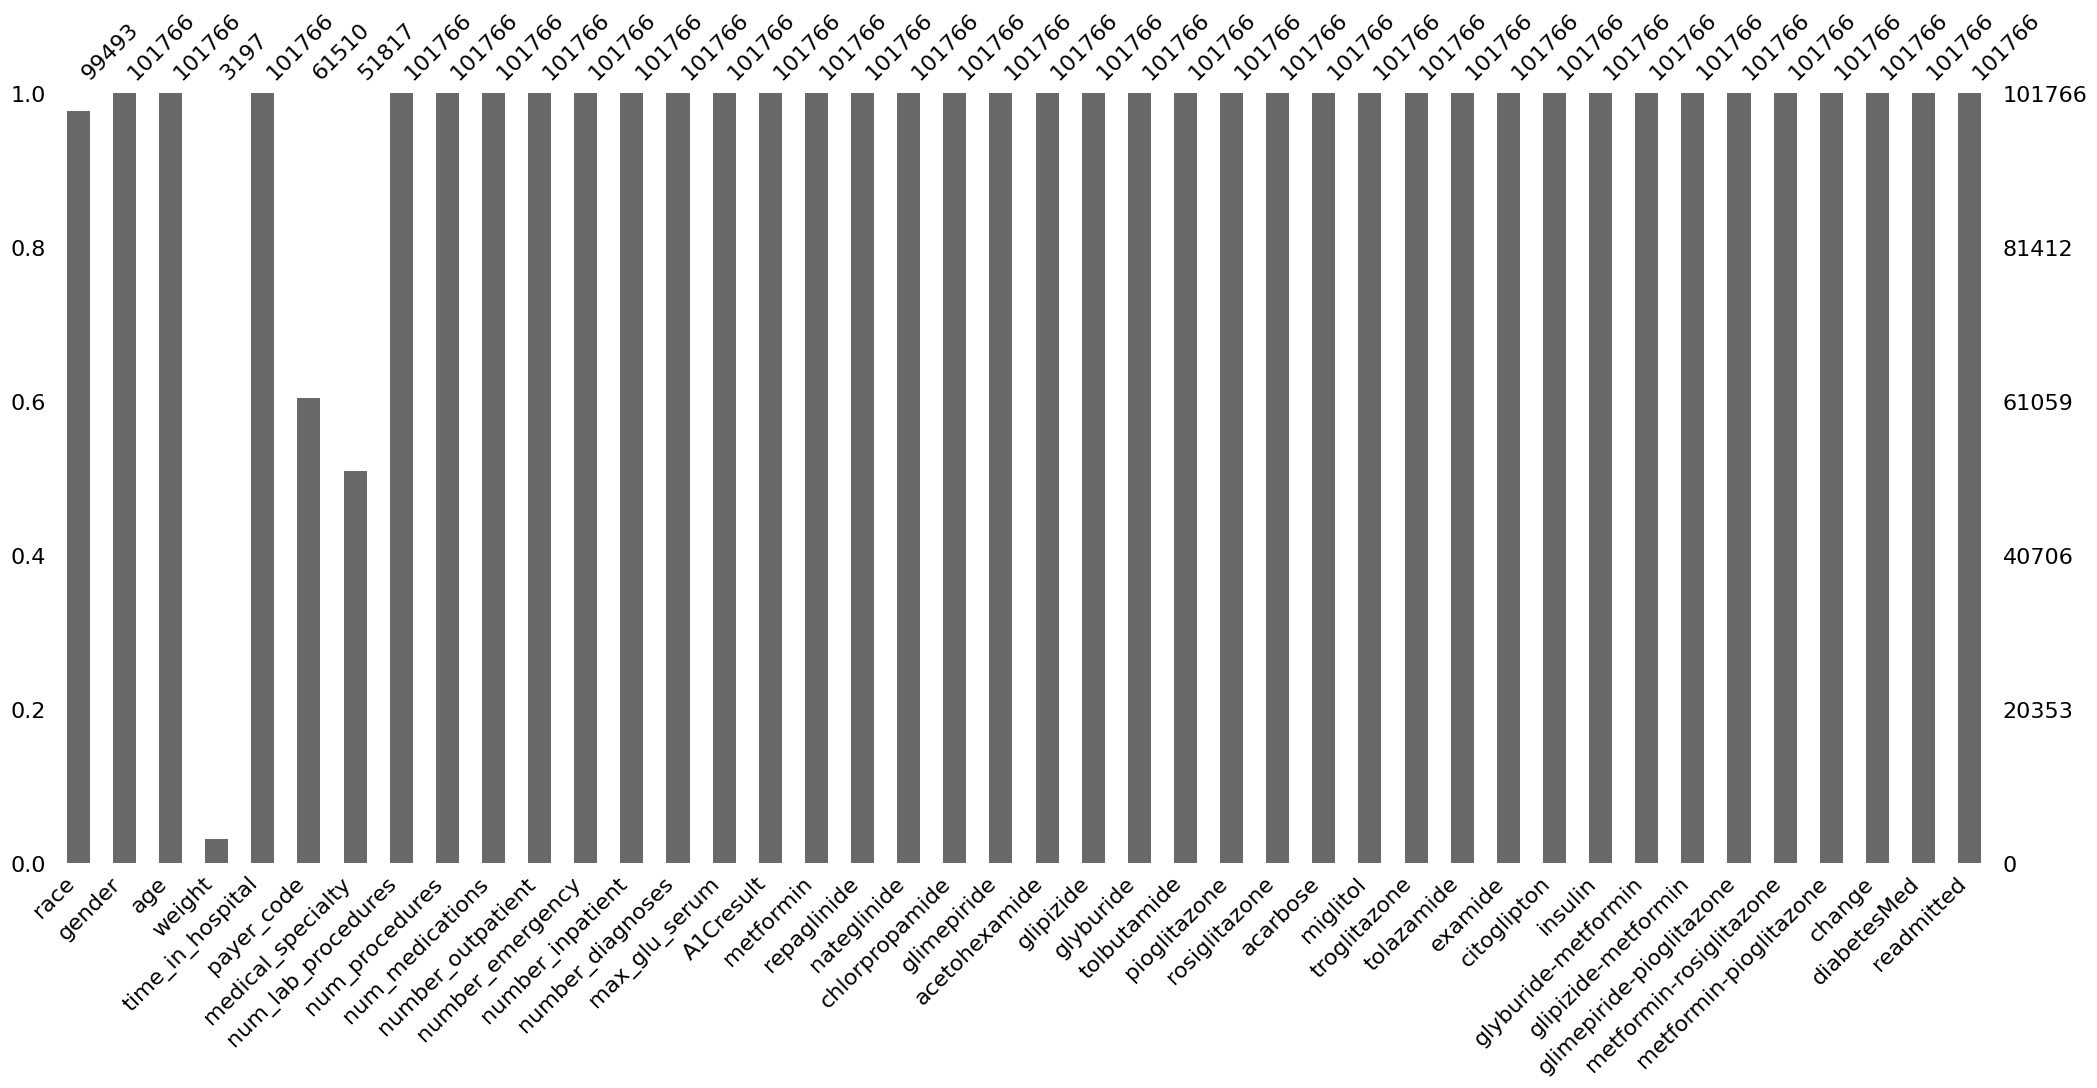

In [14]:
# Visualizing the missing data
msno.bar(diabetes)

In [15]:
# Dropping the 'weight' column as it has large percentage (%97) of missing values
diabetes.drop(['weight'], axis = 1, inplace = True)

In [16]:
# Because the columns with missing values are all categorical values with object datatypes,
# I decided to replace the null values with 'N/A'.
diabetes = diabetes.fillna('N/A')

<Axes: >

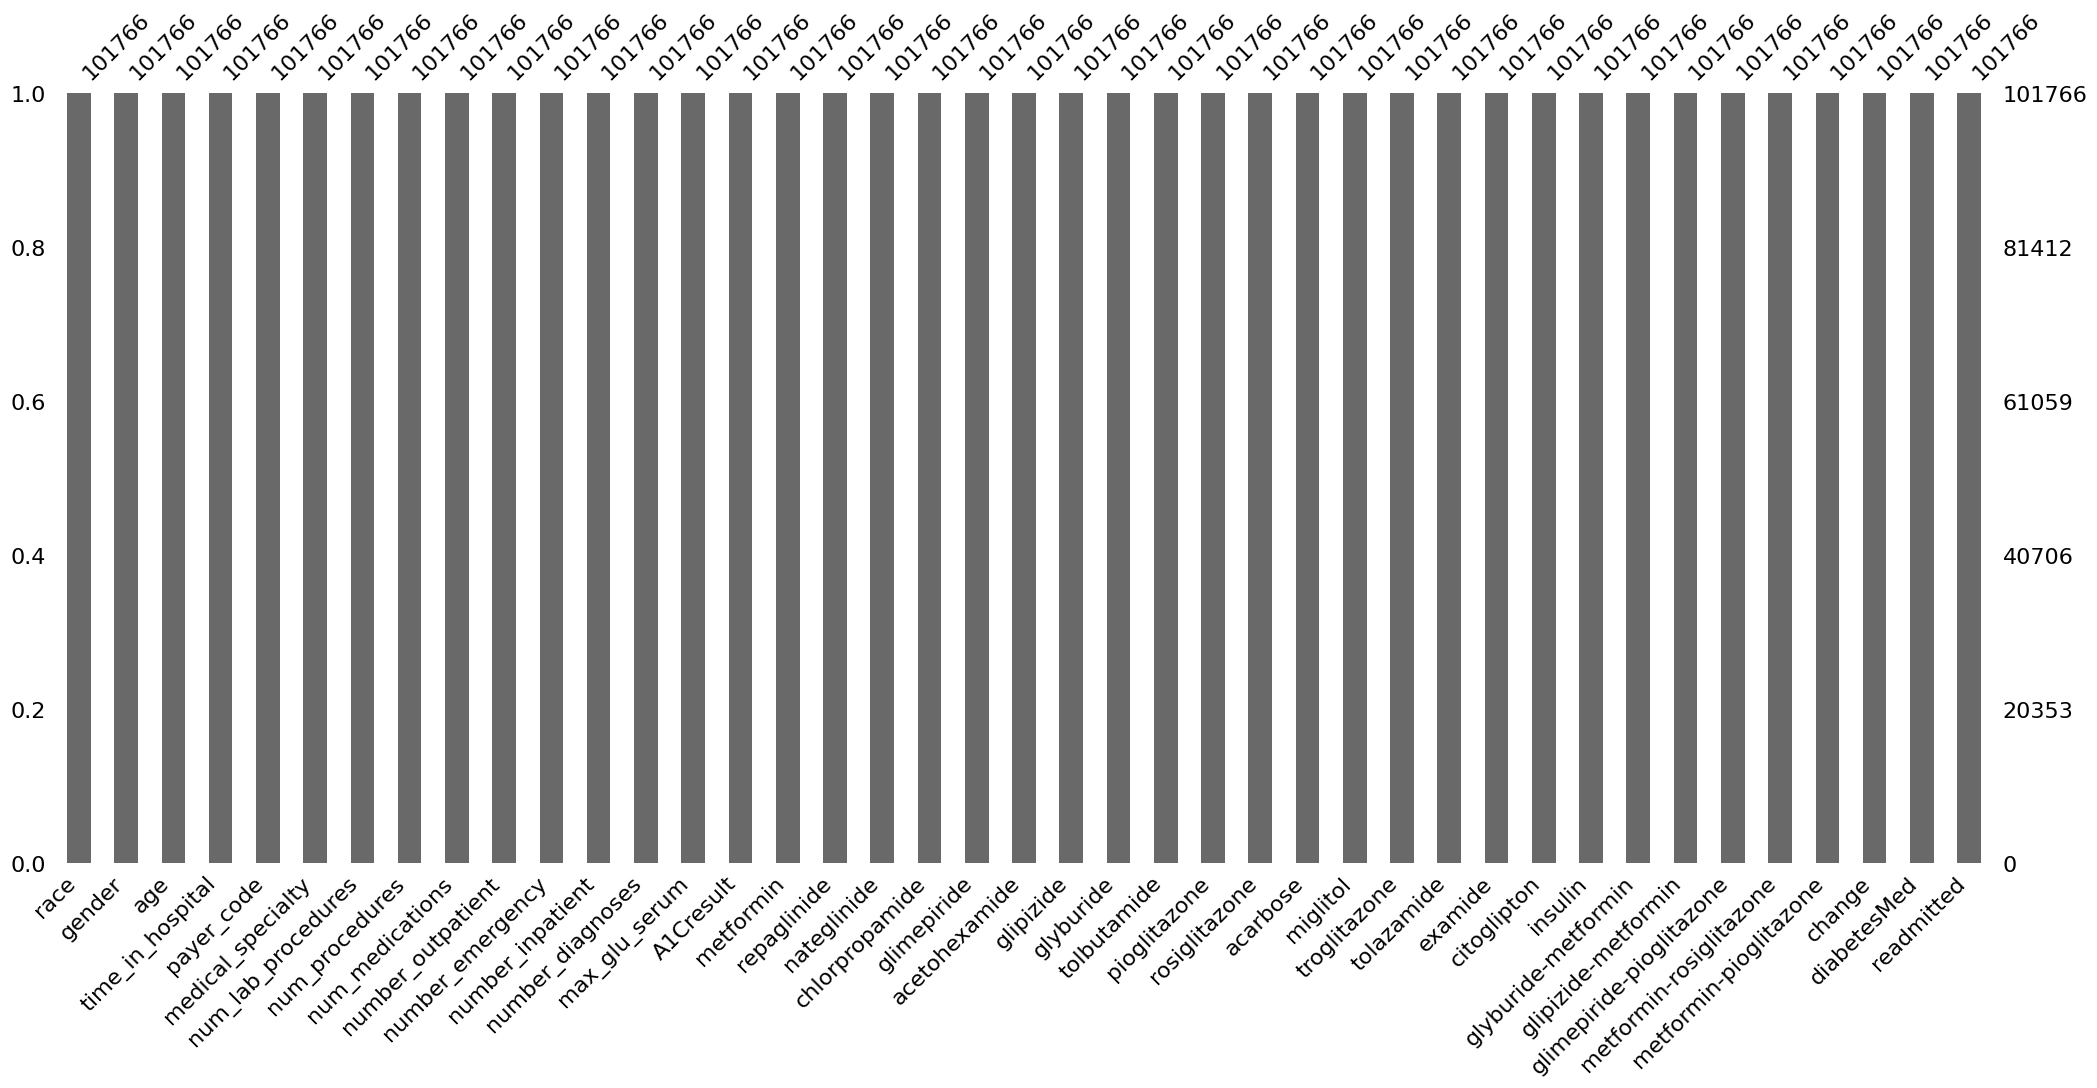

In [17]:
msno.bar(diabetes)

# **Transforming Categorical to Numerical w/ .replace()**

In [ ]:
df = diabetes[['time_in_hospital','A1Cresult','diabetesMed','insulin','readmitted']]

In [ ]:
## 0 = not readmitted and readmitted after 30 days
## 1 = readmitted within 30 days
df['readmitted'] = df['readmitted'].replace({'NO':0, '>30':0, '<30':1}).astype(int)


df['A1Cresult'] = df['A1Cresult'].replace({'not_measured':0, 'Norm':1, '>7':2, '>8':3}).astype(int)
df['diabetesMed'] = df['diabetesMed'].replace({'No':0, 'Yes':1}).astype(int)
df['insulin'] = df['insulin'].replace({'Down':1, 'No':2, 'Steady':3, 'Up':4}).astype(int)

# **ANOVA**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('readmitted ~ C(time_in_hospital) * C(A1Cresult) * C(diabetesMed) * C(insulin)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3, alpha=0.05)
print(anova_table)

                                                          sum_sq        df  \
Intercept                                              15.409042       1.0   
C(time_in_hospital)                                     4.155816      13.0   
C(A1Cresult)                                            0.078025       3.0   
C(diabetesMed)                                          5.252910       1.0   
C(insulin)                                              1.678790       3.0   
C(time_in_hospital):C(A1Cresult)                        4.774194      39.0   
C(time_in_hospital):C(diabetesMed)                      2.693367      13.0   
C(A1Cresult):C(diabetesMed)                             0.038260       3.0   
C(time_in_hospital):C(insulin)                          7.064514      39.0   
C(A1Cresult):C(insulin)                                 0.455660       9.0   
C(diabetesMed):C(insulin)                               3.950660       3.0   
C(time_in_hospital):C(A1Cresult):C(diabetesMed)         3.812882

# **ML Models**

## **Breaking the data up into Train & Test**

In [ ]:
train_df, valid_df, test_df = np.split(df.sample(frac=1, random_state=42),
                                       [int(.7*len(df)), int(0.85*len(df))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [ ]:
df.readmitted.value_counts()

readmitted
0    90409
1    11357
Name: count, dtype: int64

In [ ]:
train_df.readmitted.value_counts()

readmitted
0    63275
1     7961
Name: count, dtype: int64

In [ ]:
valid_df.readmitted.value_counts()

readmitted
0    13520
1     1745
Name: count, dtype: int64

In [ ]:
test_df.readmitted.value_counts()

readmitted
0    13614
1     1651
Name: count, dtype: int64

## **Treating the Imbalance in the Data**

In [ ]:
def calc_prevalence(y_actual):

    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.

    Params:
    1. y_actual: The target feature

    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''

    return (sum(y_actual)/len(y_actual))

In [ ]:
# split the training data into positive and negative
rows_pos = train_df.readmitted == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
diabetes_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples
diabetes_df_balanced = diabetes_df_balanced.sample(n = len(diabetes_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(diabetes_df_balanced), \
                                                calc_prevalence(diabetes_df_balanced.readmitted.values)))

Train balanced prevalence(n = 15922):0.500


In [ ]:
diabetes_df_balanced.readmitted.value_counts()

readmitted
1    7961
0    7961
Name: count, dtype: int64

In [ ]:
X_train = diabetes_df_balanced.drop('readmitted',axis=1)

y_train = diabetes_df_balanced['readmitted']

X_valid = valid_df.drop('readmitted',axis=1)

y_valid = valid_df['readmitted']

X_test = test_df.drop('readmitted',axis=1)

y_test = test_df['readmitted']

In [ ]:
print(X_train.isna().sum())

time_in_hospital    0
A1Cresult           0
diabetesMed         0
insulin             0
dtype: int64


In [ ]:
scaler=StandardScaler()
X_train[['time_in_hospital','diabetesMed','insulin']] = pd.DataFrame(scaler.fit_transform(X_train[['time_in_hospital','diabetesMed','insulin']]),columns=['time_in_hospital','diabetesMed','insulin'])
X_valid[['time_in_hospital','diabetesMed','insulin']] = pd.DataFrame(scaler.transform(X_valid[['time_in_hospital','diabetesMed','insulin']]),columns=['time_in_hospital','diabetesMed','insulin'])
X_test[['time_in_hospital','diabetesMed','insulin']] = pd.DataFrame(scaler.transform(X_test[['time_in_hospital','diabetesMed','insulin']]),columns=['time_in_hospital','diabetesMed','insulin'])

## **Creating and Understanding Models**

In [ ]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):

    '''
    This function calculates all the metrics to asses the machine learning models.

    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5

    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

### **Linear Regression**

In [ ]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)


y_valid_preds = lnr.predict(X_valid)

In [ ]:
y_valid_preds

array([0.44228512, 0.48747993, 0.55029696, ..., 0.5230595 , 0.48616078,
       0.54897781])

### **Logistic Regression**

In [ ]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.543
accuracy:0.583
recall:0.465
precision:0.130
specificity:0.598
prevalence:0.114
 


### **KNN Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

knn_preds = knn.predict_proba(X_valid)[:,1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,knn_preds, 0.5)

AUC:0.541
accuracy:0.563
recall:0.484
precision:0.128
specificity:0.444
prevalence:0.114
 


### **Stochastic Gradient Descent Model**

In [ ]:
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

sgd_preds = sgdc.predict_proba(X_valid)[:,1]

print('Stochastic Gradient Descent')
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, \
                sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,sgd_preds, 0.5)

Stochastic Gradient Descent
Validation:
AUC:0.542
accuracy:0.591
recall:0.454
precision:0.130
specificity:0.609
prevalence:0.114
 


### **Decision Tree**

In [ ]:
dc_clf = DecisionTreeClassifier(random_state=42, max_depth = 10)
dc_clf.fit(X_train, y_train)

dc_preds_proba = dc_clf.predict_proba(X_valid)[:,1]
dc_preds = dc_clf.predict(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,dc_preds_proba, 0.5)

AUC:0.548
accuracy:0.556
recall:0.512
precision:0.131
specificity:0.527
prevalence:0.114
 


### **Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(random_state=111, max_depth = 6)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_valid)
rf_preds_proba = rf_clf.predict_proba(X_valid)[:, 1]

print('Random Forest')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,rf_preds_proba, 0.5)

Random Forest
AUC:0.550
accuracy:0.520
recall:0.566
precision:0.131
specificity:0.514
prevalence:0.114
 


### **Linear SVC**

In [ ]:
lsvc_clf = LinearSVC(random_state=111)
lsvc_clf.fit(X_train, y_train)

lsvc_preds = lsvc_clf.decision_function(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,lsvc_preds, 0.5)

AUC:0.543
accuracy:0.886
recall:0.000
precision:0.000
specificity:1.000
prevalence:0.114
 


### **Gradient Boosting Model**

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators = 100, criterion='friedman_mse', learning_rate = 1.0, max_depth = 3,\
                                    random_state = 111)

gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_valid)
gb_preds_proba = gb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,gb_preds_proba, 0.5)

AUC:0.547
accuracy:0.547
recall:0.532
precision:0.132
specificity:0.549
prevalence:0.114
 


### **XGB Model**

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate = 1.0, use_label_encoder = False,\
                            eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_valid)
xgb_preds_proba = xgb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,xgb_preds_proba, 0.5)

AUC:0.547
accuracy:0.542
recall:0.539
precision:0.132
specificity:0.542
prevalence:0.114
 


### **CatBoost Model**

In [ ]:
catb=CatBoostClassifier(iterations=200, depth=3, learning_rate=1.0, random_state = 111)
catb.fit(X_train, y_train)
catb_preds = catb.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,catb_preds, 0.5)

0:	learn: 0.6880700	total: 10.4ms	remaining: 2.08s
1:	learn: 0.6869402	total: 17.7ms	remaining: 1.75s
2:	learn: 0.6861335	total: 28ms	remaining: 1.84s
3:	learn: 0.6859312	total: 35.3ms	remaining: 1.73s
4:	learn: 0.6857749	total: 44.1ms	remaining: 1.72s
5:	learn: 0.6855887	total: 59.5ms	remaining: 1.93s
6:	learn: 0.6851360	total: 65.9ms	remaining: 1.82s
7:	learn: 0.6849665	total: 74.2ms	remaining: 1.78s
8:	learn: 0.6848843	total: 85.2ms	remaining: 1.81s
9:	learn: 0.6848384	total: 90.8ms	remaining: 1.73s
10:	learn: 0.6847713	total: 102ms	remaining: 1.75s
11:	learn: 0.6847052	total: 109ms	remaining: 1.71s
12:	learn: 0.6846314	total: 117ms	remaining: 1.69s
13:	learn: 0.6845322	total: 126ms	remaining: 1.68s
14:	learn: 0.6844483	total: 138ms	remaining: 1.7s
15:	learn: 0.6844275	total: 147ms	remaining: 1.69s
16:	learn: 0.6842768	total: 156ms	remaining: 1.68s
17:	learn: 0.6841962	total: 165ms	remaining: 1.67s
18:	learn: 0.6840926	total: 177ms	remaining: 1.69s
19:	learn: 0.6839785	total: 183ms	

# **Hyperparameter Tuning**

In [ ]:
recall_scoring = make_scorer(recall_score)

## **Decision Tree - Hyper Parameter Tuning**

In [ ]:
dc_grid = {'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

dc_random = RandomizedSearchCV(estimator = dc_clf, param_distributions = dc_grid,
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

dc_random.fit(X_train, y_train)

dc_random.best_params_

dc_hp_preds = dc_random.best_estimator_.predict(X_valid)
dc_hp_preds_proba = dc_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, dc_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.5400214051982841

In [ ]:
recall_score(y_valid, dc_hp_preds)

0.6045845272206304

## **Random Forest - Hyper Parameter Tuning**

In [ ]:
rf_grid = {'n_estimators':range(200,1000,200), # number of trees
           'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = rf_grid,
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

rf_random.fit(X_train, y_train)

rf_random.best_params_

rf_hp_preds = rf_random.best_estimator_.predict(X_valid)
rf_hp_preds_proba = rf_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, rf_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.5489731227005307

In [ ]:
recall_score(y_valid, rf_hp_preds)

0.5553008595988539

## **XGBoost - Hyper Parameter Tuning**

In [ ]:
xgb_grid = params = {
        'min_child_weight': [1, 5, 8, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5]
        } # criterion for evaluating a split

xgb_random = GridSearchCV(estimator = xgb_clf, param_grid = xgb_grid,
                               cv = 2, scoring = recall_scoring,
                               verbose = 1)

xgb_random.fit(X_train, y_train)

xgb_random.best_params_

xgb_hp_preds = xgb_random.best_estimator_.predict(X_valid)
xgb_hp_preds_proba = xgb_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, xgb_hp_preds_proba)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


0.5514970498974247

In [ ]:
recall_score(y_valid, xgb_hp_preds)

0.5358166189111748